In [61]:
# load the required libs
from pathlib import Path
import pydicom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
PATH = "resources/03-Data-Formats/"

# Read Files

## Read a sample DICOM file

In [3]:
dicom_file = pydicom.read_file(f"{PATH}ID_0000_AGE_0060_CONTRAST_1_CT.dcm")

In [4]:
# read the dicom header
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [5]:
# access the number of rows in the images
dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

In [6]:
# access using label
dicom_file.Rows

512

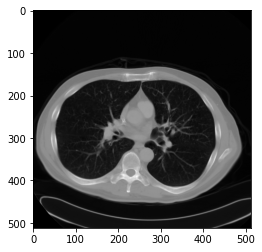

In [7]:
# EXTRACT THE IMAGE
img = dicom_file.pixel_array
plt.figure()
plt.imshow(img, cmap='gray')

## Read MRI scan using pydicom

In [8]:
path_to_mri_scan = Path(f"{PATH}SE000001")

In [9]:
# extract the paths of all the files
all_files = list(path_to_mri_scan.glob("*"))
all_files

[WindowsPath('resources/03-Data-Formats/SE000001/MR000000'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000001'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000002'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000003'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000004'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000005'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000006'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000007'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000008'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000009'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000010'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000011'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000012'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000013'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000014'),
 WindowsPath('resources/03-Data-Formats/SE000001/MR000015'),
 WindowsPath('resources/

In [10]:
# read the mri files
mri_data = []

for path in all_files:
    data = pydicom.read_file(path)
    mri_data.append(data)

In [11]:
# check if the order of the files is correct
for slice1 in mri_data:
    print(slice1.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714
29.9999952815023
35.9999959546749
41.9999963629367
47.9999970362677
53.9999958207213
59.9999962290673
65.9999961939969
71.9999961590453
77.9999962275740
83.9999967682912
89.9999955528687
95.9999960937442
101.999994745866
107.999995419197
113.999995959439
119.999996566542
125.999997173645
131.999997780749
137.999998321624
143.999998928727
149.999999502083
155.999992554172


In [13]:
# still we will run order the file
mri_data = sorted(mri_data, key=lambda x : x.SliceLocation)

In [14]:
# create complete image
full_volume = []
for slice1 in mri_data:
    full_volume.append(slice1.pixel_array)

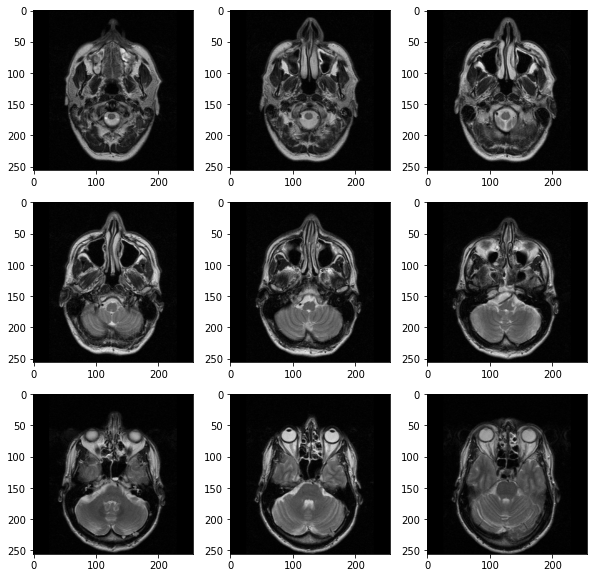

In [16]:
fig, axis = plt.subplots(3, 3, figsize=(10,10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(full_volume[slice_counter], cmap='gray')
        slice_counter += 1

## Read MRI scan using SimpleITK 

In [18]:
import SimpleITK as sitk

In [20]:
str(path_to_mri_scan)

'resources\\03-Data-Formats\\SE000001'

In [21]:
# extract the series id
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_mri_scan))
print(series_ids)

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)


In [25]:
# extract the file names
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_mri_scan), series_ids[0])
(series_file_names)

('resources\\03-Data-Formats\\SE000001\\MR000000',
 'resources\\03-Data-Formats\\SE000001\\MR000001',
 'resources\\03-Data-Formats\\SE000001\\MR000002',
 'resources\\03-Data-Formats\\SE000001\\MR000003',
 'resources\\03-Data-Formats\\SE000001\\MR000004',
 'resources\\03-Data-Formats\\SE000001\\MR000005',
 'resources\\03-Data-Formats\\SE000001\\MR000006',
 'resources\\03-Data-Formats\\SE000001\\MR000007',
 'resources\\03-Data-Formats\\SE000001\\MR000008',
 'resources\\03-Data-Formats\\SE000001\\MR000009',
 'resources\\03-Data-Formats\\SE000001\\MR000010',
 'resources\\03-Data-Formats\\SE000001\\MR000011',
 'resources\\03-Data-Formats\\SE000001\\MR000012',
 'resources\\03-Data-Formats\\SE000001\\MR000013',
 'resources\\03-Data-Formats\\SE000001\\MR000014',
 'resources\\03-Data-Formats\\SE000001\\MR000015',
 'resources\\03-Data-Formats\\SE000001\\MR000016',
 'resources\\03-Data-Formats\\SE000001\\MR000017',
 'resources\\03-Data-Formats\\SE000001\\MR000018',
 'resources\\03-Data-Formats\\S

In [26]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [27]:
image_data = series_reader.Execute()

In [28]:
head_mri = sitk.GetArrayFromImage(image_data)
head_mri.shape

(27, 256, 256)

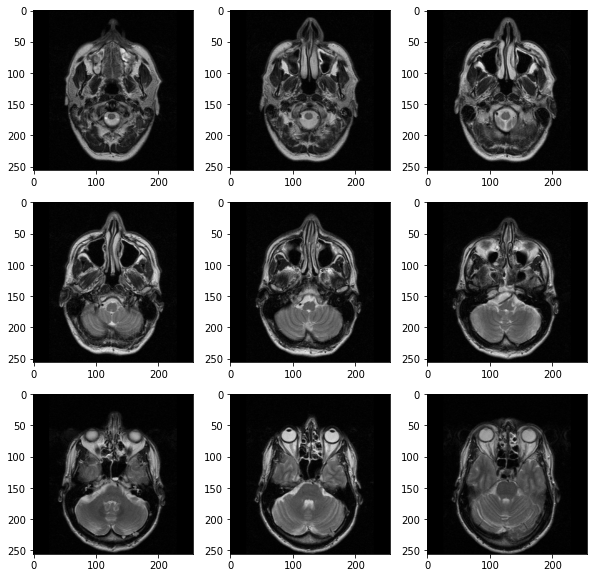

In [29]:
fig, axis = plt.subplots(3, 3, figsize=(10,10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(head_mri[slice_counter], cmap='gray')
        slice_counter += 1

## Read MRI scan using NifTi

In [32]:
# convert the file from DICOM to NifTi
import dicom2nifti

dicom2nifti.convert_directory(str(path_to_mri_scan), ".")

In [33]:
# load file
import nibabel as nib

nifti_file = nib.load("201_t2w_tse.nii.gz")
print(nifti_file)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (256, 256, 27)
affine: 
[[-9.36898887e-01  3.20514254e-02  6.37919828e-02  1.15272324e+02]
 [ 3.03588901e-02  9.27917123e-01 -8.33337128e-01 -9.72956390e+01]
 [ 1.43172191e-02  1.29802674e-01  5.94150448e+00 -8.23735046e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 256 256  27   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         0.9375     0.9375     5.9999995  1.         1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal

In [34]:
nifti_file.header['qoffset_x']

array(115.27232, dtype=float32)

In [35]:
nifti_file.shape

(256, 256, 27)

In [36]:
image_array = nifti_file.get_fdata()
image_array.shape

(256, 256, 27)

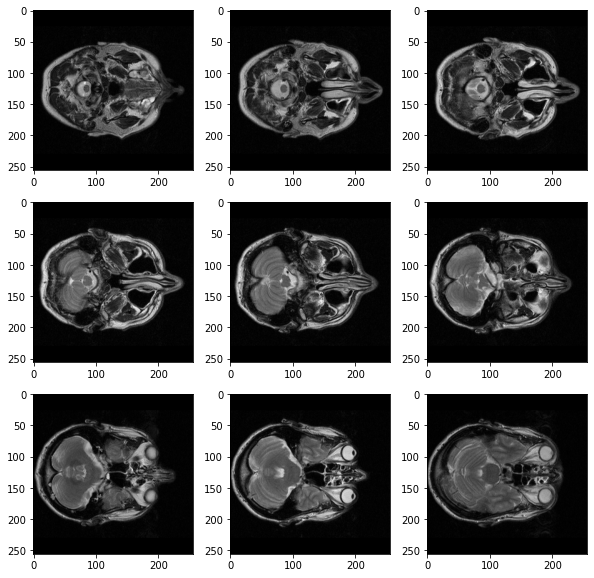

In [38]:
fig, axis = plt.subplots(3, 3, figsize=(10,10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(image_array[:,:,slice_counter], cmap='gray')
        slice_counter += 1

In [39]:
image_processed = image_array * (image_array > 300)

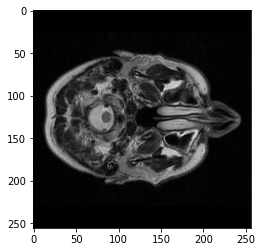

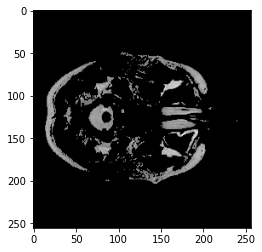

In [41]:
# plot the processed images
plt.figure()
plt.imshow(image_array[:,:,1], cmap="gray")
plt.figure()
plt.imshow(image_processed[:,:,1], cmap="gray")

In [42]:
processed_nifti = nib.Nifti1Image(image_processed, nifti_file.affine)

In [43]:
# save the file
nib.save(processed_nifti, "processed_nifti_image.nii.gz")

# Image Preprocessing

In [47]:
PATH

'resources/03-Data-Formats/'

In [50]:
# load file
brain_mri = nib.load(f"{PATH}03-Preprocessing/IXI662-Guys-1120-T1.nii.gz")

# extract the array
brain_mri_data = brain_mri.get_fdata()
brain_mri_data.shape

(256, 256, 150)

In [51]:
# extract the affine matrix
affine_matrix = brain_mri.affine
shape = brain_mri.shape

In [52]:
# the 3x3 matrix define scaling, rotation & shearing
# the addional dimension is for translation
print(affine_matrix)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [54]:
brain_mri.header.get_zooms()

(0.9375, 0.9375, 1.2000039)

In [55]:
# check the orientation
nib.aff2axcodes(affine_matrix)

('P', 'S', 'R')

Understanding the axes from the tuple :
1. P -  Anterior to Posterior : Coronal/Frontal
2. S -  Inferior to Superior  : Axial
3. R -  Left to Right         : Sagittal    

<IPython.core.display.Javascript object>


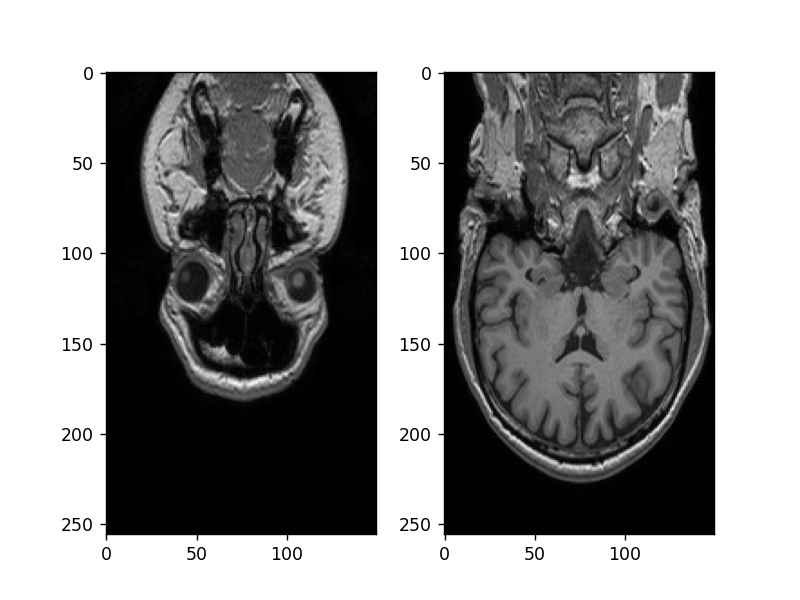

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(brain_mri_data[40,:,:], cmap="gray")
axes[1].imshow(brain_mri_data[120,:,:], cmap ="gray")

<IPython.core.display.Javascript object>


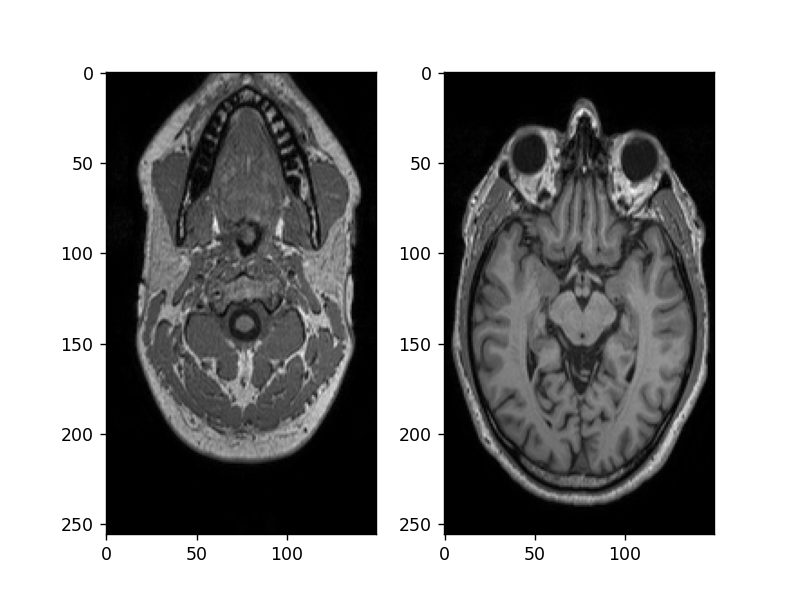

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(brain_mri_data[:,30,:], cmap="gray")
axes[1].imshow(brain_mri_data[:,120,:], cmap ="gray")

<IPython.core.display.Javascript object>


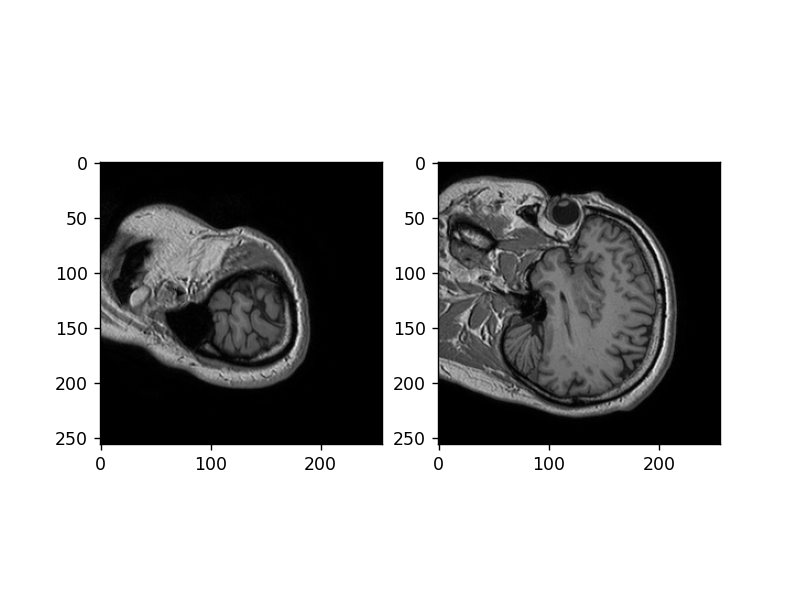

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(brain_mri_data[:,:,20], cmap="gray")
axes[1].imshow(brain_mri_data[:,:,45], cmap ="gray")

## Transforming coords from Voxel to Physical space 

In [62]:
voxel_coords = np.array([0,0,0,1])

# transform into physical coordinates
physical_coords = affine_matrix @ voxel_coords 
physical_coords

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

In [63]:
# transform physical coords into voxel spaces
np.linalg.inv(affine_matrix) @ physical_coords

array([-1.0658141e-14,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00])

## Resampling

In [64]:
print(brain_mri_data.shape)
print(brain_mri.header.get_zooms())

(256, 256, 150)
(0.9375, 0.9375, 1.2000039)


In [66]:
import nibabel.processing

In [67]:
# set the voxel size
voxel_size = (2, 2, 2)
brain_mri_resize = nibabel.processing.conform(brain_mri, (128,128,150), voxel_size, orientation="PSR")
brain_mri_resize_data = brain_mri_resize.get_fdata()

print(brain_mri_resize_data.shape)
print(brain_mri_resize.header.get_zooms())

(128, 128, 150)
(2.0, 2.0, 2.0)


<IPython.core.display.Javascript object>


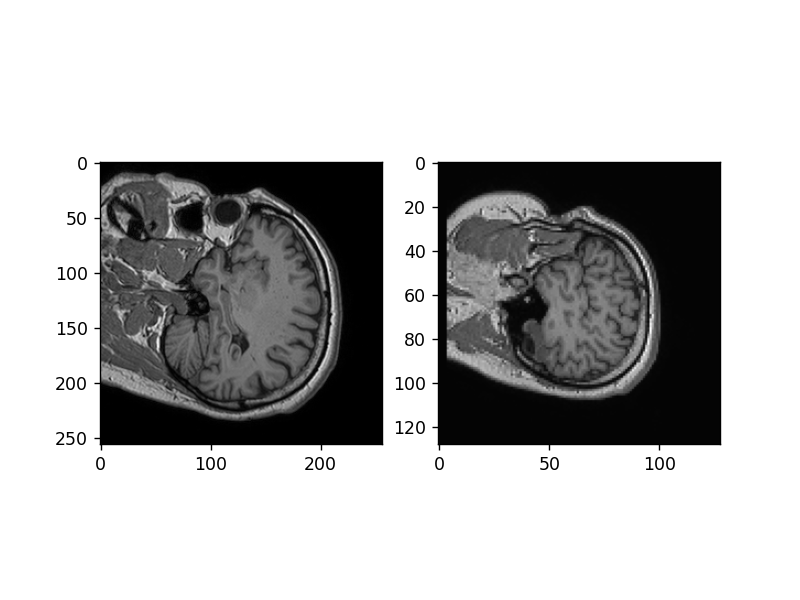

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(brain_mri_data[:,:,50], cmap="gray")
axes[1].imshow(brain_mri_resize_data[:,:,50], cmap ="gray")

## Normalization & Standardization for CT

In [69]:
# load the file
lung_ct = nib.load(f"{PATH}03-Preprocessing/lung_043.nii.gz")
lung_ct_data = lung_ct.get_fdata()

In [70]:
lung_ct_data_std = lung_ct_data/3071

<IPython.core.display.Javascript object>


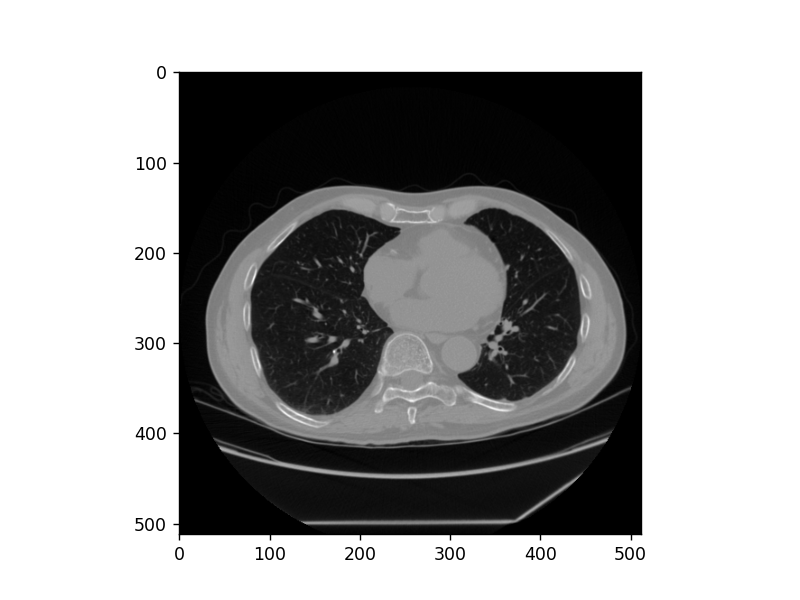

In [72]:
plt.figure()
plt.imshow(np.rot90(lung_ct_data_std[:,:,50]), cmap="gray")

<IPython.core.display.Javascript object>


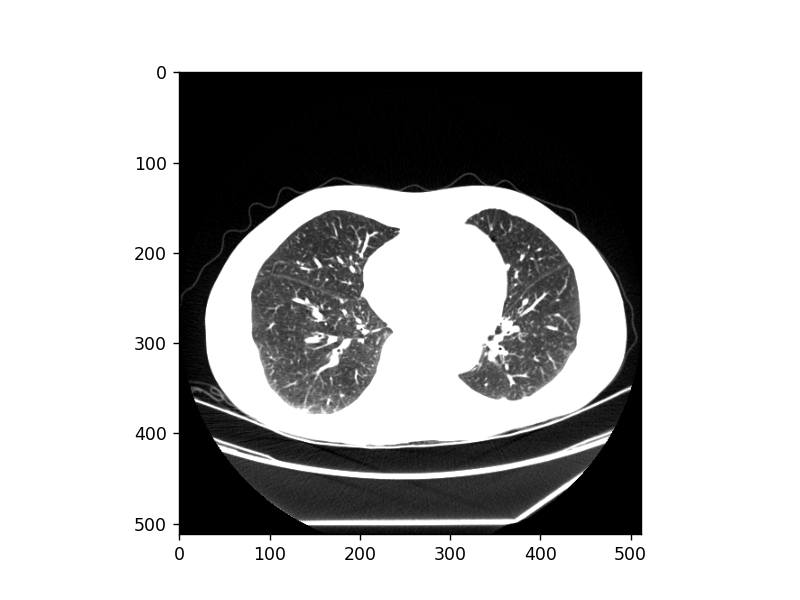

In [78]:
# lung window
lung_ct_lung_window = np.clip(lung_ct_data, -1000, -500)
plt.figure()
plt.imshow(np.rot90(lung_ct_lung_window[:,:,50]), cmap="gray")

<IPython.core.display.Javascript object>


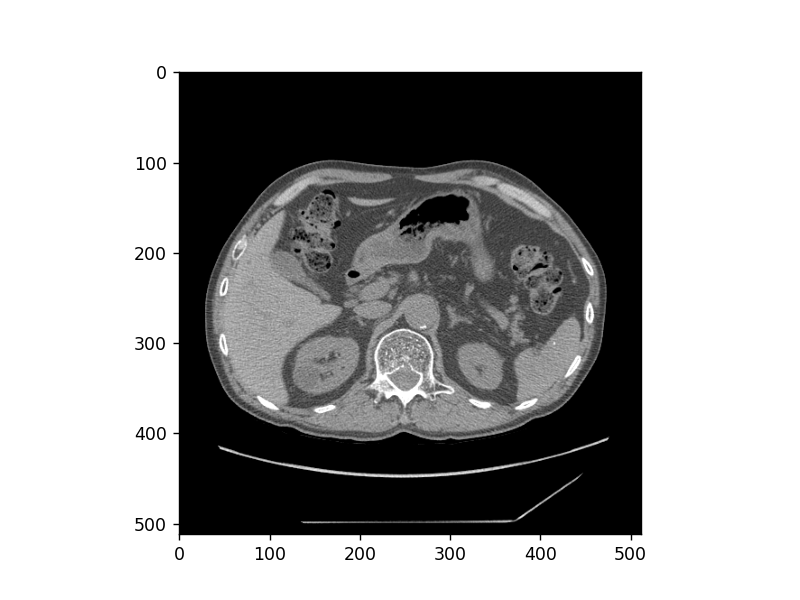

In [80]:
# soft tissue window
lung_ct_st_window = np.clip(lung_ct_data, -250, 250)
plt.figure()
plt.imshow(np.rot90(lung_ct_st_window[:,:,5]), cmap="gray")

## Normalization & Standardization for MRI

In [81]:
# load the file
cardiac_mri = nib.load(f"{PATH}03-Preprocessing/la_003.nii.gz")
cardiac_mri_data = cardiac_mri.get_fdata()

In [82]:
cardiac_mean, cardiac_std = np.mean(cardiac_mri_data), np.std(cardiac_mri_data)

# normalization
cardiac_mri_norm = (cardiac_mri_data - cardiac_mean) / cardiac_std

In [84]:
# standardization
cardiac_mri_standardization = (cardiac_mri_norm - np.min(cardiac_mri_norm))/(np.max(cardiac_mri_norm) - np.min(cardiac_mri_norm))

print(np.mean(cardiac_mri_standardization), np.min(cardiac_mri_standardization),  np.max(cardiac_mri_standardization))

0.08641350659554545 0.0 1.0


<IPython.core.display.Javascript object>


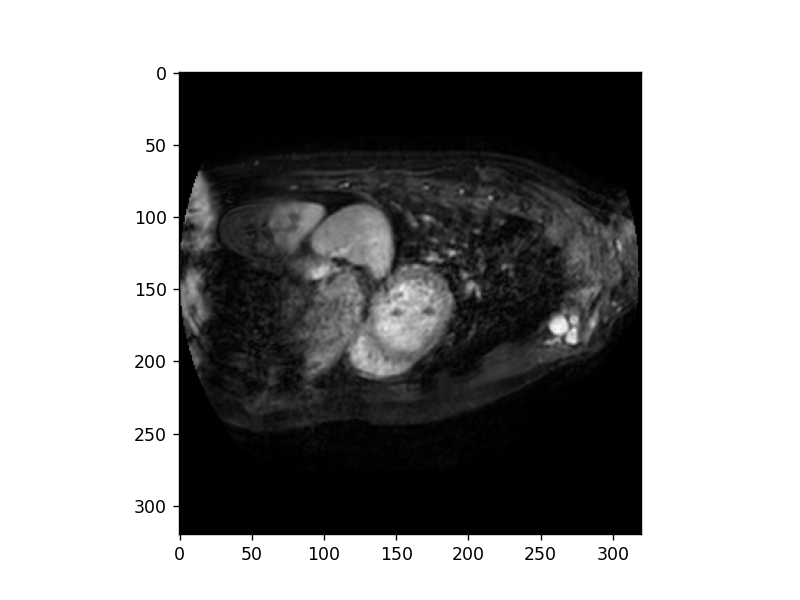

In [85]:
plt.figure()
plt.imshow(cardiac_mri_standardization[:,:,30], cmap="gray")